In [1]:
import pandas as pd
import os #usar funcionalidades que são dependentes de sistema operacional

# Definir o caminho para o diretório temporário onde o repositório será clonado
clone_path = '/tmp/Estudos_Pandas'
excel_file_path = os.path.join(clone_path, '1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx')
repository_url = 'https://github.com/YuriArduino/Estudos_Pandas.git'
branch_name = 'data-tests'

# Remover o diretório do repositório se ele já existir para garantir um clone limpo
# Isso evita o erro "destination path '...' already exists and is not an empty directory"
if os.path.exists(clone_path):
    print(f"Removendo diretório existente: {clone_path}")
    !rm -rf {clone_path}

# Clonar o repositório do GitHub, especificando o branch 'data-tests'
print(f"Clonando repositório do branch '{branch_name}' para {clone_path}...")
!git clone --branch {branch_name} {repository_url} {clone_path}

# Mudar para o diretório do repositório clonado
print(f"Mudando para o diretório: {clone_path}")
%cd {clone_path}

# Puxar os arquivos grandes (LFS) do repositório.
# Este passo é crucial pois o arquivo Excel está armazenado usando Git LFS.
print("Puxando arquivos LFS...")
!git lfs pull

# Voltar para o diretório de conteúdo original do Colab
print("Voltando para o diretório original (/content/)...")
%cd /content/

# Verificar se o arquivo Excel existe no caminho esperado após o clone e LFS pull
if os.path.exists(excel_file_path):
    print(f"Arquivo Excel encontrado em: {excel_file_path}")
    # Ler o arquivo Excel para um DataFrame pandas
    # Motor 'openpyxl' para arquivos .xlsx
    print("Lendo o arquivo Excel com pandas...")
    emissoes_gases = pd.read_excel(excel_file_path, engine='openpyxl', sheet_name = 'GEE Estados',)

    # Exibir as primeiras 5 linhas do DataFrame
    print("Exibindo as primeiras linhas do DataFrame:")
    display(emissoes_gases.head())
else:
    print(f"Erro: O arquivo Excel não foi encontrado em {excel_file_path} após o clone e LFS pull.")
    print("Por favor, verifique se o nome do arquivo e o branch estão corretos.")

Clonando repositório do branch 'data-tests' para /tmp/Estudos_Pandas...
Cloning into '/tmp/Estudos_Pandas'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 103 (delta 42), reused 10 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (103/103), 4.62 MiB | 6.92 MiB/s, done.
Resolving deltas: 100% (42/42), done.
Mudando para o diretório: /tmp/Estudos_Pandas
/tmp/Estudos_Pandas
Puxando arquivos LFS...
Voltando para o diretório original (/content/)...
/content
Arquivo Excel encontrado em: /tmp/Estudos_Pandas/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx
Lendo o arquivo Excel com pandas...


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Exibindo as primeiras linhas do DataFrame:


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


In [2]:
emissoes_gases = emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'] == 'Emissão']
emissoes_gases = emissoes_gases.drop(columns = 'Emissão / Remoção / Bunker')

#Alterando o formato do DataFrame


Para fazer esse agrupamento de forma correta, precisamos alterar o formato do DataFrame. A nossa tabela possui as informações de emissão separada por colunas de anos, mas precisamos alterar o formato para:

*  Apenas uma coluna contendo as informações dos anos. Assim, cada linha vai conter uma informação de um ano diferente;
*  Apenas uma coluna com os dados de emissão.

Para isso, vamos precisar manter as informações da coluna "Nível 1 - Setor" até "Produto", ou seja, da primeira a décima coluna. Mas, vamos alterar as informações dos anos de 1970 até 2021.

Isto é, todas as colunas com informações numéricas vão se transformar em apenas duas colunas: uma coluna com informação dos anos (que atualmente está no cabeçalho da coluna) e outra coluna com as informações de emissão.

##Armazenando as informações das colunas

In [4]:
emissoes_gases.loc[:,'Nível 1 - Setor':'Produto'].columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Gás', 'Estado', 'Atividade Econômica', 'Produto'],
      dtype='object')

In [6]:
colunas_info =list(emissoes_gases.loc[:,'Nível 1 - Setor':'Produto'].columns)
colunas_info

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [7]:
emissoes_gases.loc[:,1970:2021].columns

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021],
      dtype='object')

In [8]:
colunas_emissao = list(emissoes_gases.loc[:,1970:2021].columns)
colunas_emissao

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

### Transformação com método `Melt`


Esse método permite fazer essa transformação de várias colunas para apenas uma coluna contendo as informações numéricas e outra com as informações que diferenciam as categorias.

In [9]:
emissoes_gases.melt(
    id_vars = colunas_info, value_vars = colunas_emissao,
    var_name = 'Ano' , value_name = 'Emissão'
    )

#id_vars a variável que contém as colunas que desejamos manter na base de dados.
#value_vars a variável que contém as colunas das informações numéricas.
#vars_name o nome dado a coluna que contém as informações dos anos.
#value_name  a coluna contendo as informações numéricas de emissão.

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


In [10]:
emissoes_por_ano = emissoes_gases.melt(
    id_vars = colunas_info, value_vars = colunas_emissao,
    var_name = 'Ano' , value_name = 'Emissão'
    )

### Formatos de dados: Wide x Long

Os dados podem ser organizados em dois formatos principais:

| Formato                | Características                                                                          | Quando usar                                     | Exemplo simplificado |                              |        |
| ---------------------- | ---------------------------------------------------------------------------------------- | ----------------------------------------------- | -------------------- | ---------------------------- | ------ |
| **Wide** (pivot)       | Muitas colunas, menos linhas. Cabeçalho com vários atributos. Pode ter valores ausentes. | Questionários, pesquisas, tabelas pivot.        | \`Ano: 2017          | 2018                         | 2019\` |
| **Long** (normalizado) | Cada observação em uma linha. Estrutura com colunas “variável” + “valor”.                | Séries temporais, experimentos, dados extensos. | \`Ano                | Valor\` (uma linha por dado) |        |

---

### Exemplo Wide

| Setor                   | 2017  | 2018  | 2019  |
| ----------------------- | ----- | ----- | ----- |
| Processos industriais   | 897.6 | 758.0 | 902.0 |
| Mudança de uso da terra | 378.0 | 388.9 | 452.0 |

### Exemplo Long

| Setor                   | Ano  | Emissão |
| ----------------------- | ---- | ------- |
| Processos industriais   | 2017 | 897.6   |
| Mudança de uso da terra | 2017 | 378.0   |

---

### Transformação no pandas (`melt()`)

```python
df.melt(
    id_vars=["Setor"],       # colunas que permanecem
    value_vars=["2017","2018","2019"],  # colunas a "derreter"
    var_name="Ano",
    value_name="Emissão"
)
```

📌 **Resumo:**

* **Wide → Long**: usar `melt()`
* **Wide** = mais colunas, menos linhas
* **Long** = mais linhas, dados normalizados


##Agrupando dados

` Método groupby()`

In [11]:
emissoes_por_ano.groupby('Gás')

`Atributo groups`

In [13]:
#obter as informações daqueles grupos gerados
emissoes_por_ano.groupby('Gás').groups

{'C2F6 (t)': [410, 411, 412, 425, 426, 427, 95158, 95159, 95160, 95173, 95174, 95175, 189906, 189907, 189908, 189921, 189922, 189923, 284654, 284655, 284656, 284669, 284670, 284671, 379402, 379403, 379404, 379417, 379418, 379419, 474150, 474151, 474152, 474165, 474166, 474167, 568898, 568899, 568900, 568913, 568914, 568915, 663646, 663647, 663648, 663661, 663662, 663663, 758394, 758395, 758396, 758409, 758410, 758411, 853142, 853143, 853144, 853157, 853158, 853159, 947890, 947891, 947892, 947905, 947906, 947907, 1042638, 1042639, 1042640, 1042653, 1042654, 1042655, 1137386, 1137387, 1137388, 1137401, 1137402, 1137403, 1232134, 1232135, 1232136, 1232149, 1232150, 1232151, 1326882, 1326883, 1326884, 1326897, 1326898, 1326899, 1421630, 1421631, 1421632, 1421645, 1421646, 1421647, 1516378, 1516379, 1516380, 1516393, ...], 'CF4 (t)': [407, 408, 409, 422, 423, 424, 95155, 95156, 95157, 95170, 95171, 95172, 189903, 189904, 189905, 189918, 189919, 189920, 284651, 284652, 284653, 284666, 284667

`Método get_group()`

In [16]:
emissoes_por_ano.groupby('Gás').get_group('CO2 (t)').head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
18,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,0.000000
23,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),RJ,OUTRA_IND,NaN,1970,0.000000
26,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),MG,OUTRA_IND,NaN,1970,0.000000
29,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,10742.465792
32,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),SE,OUTRA_IND,NaN,1970,0.000000


##Métodos de agregação

Os métodos de agregação que podemos utilizar com o groupby() são:

*  count() para realizar contagem;
*  sum() para soma;
*  mean() para a média;
*  median() para a mediana;
*  min() para o valor mínimo;
*  max() para o valor máximo;
*  std() para o desvio-padrão;
*  var() para a variância

###Somando as emissões por tipo de gás

In [17]:
emissoes_por_ano.groupby('Gás').sum(numeric_only = True)

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


In [18]:
#podemos definir as colunas passando o valor entre chaves
emissoes_por_ano.groupby('Gás')['Emissão'].sum(numeric_only = True)

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


###Ordenando os dados conforme a emissão com `sort_values()`

In [24]:
#ascending = False organização decrescente

emissao_por_gas = emissoes_por_ano.groupby(
    'Gás')[['Emissão']].sum().sort_values(
        'Emissão', ascending = False
        )
emissao_por_gas

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


###Visualizando os dados em forma de gráfico

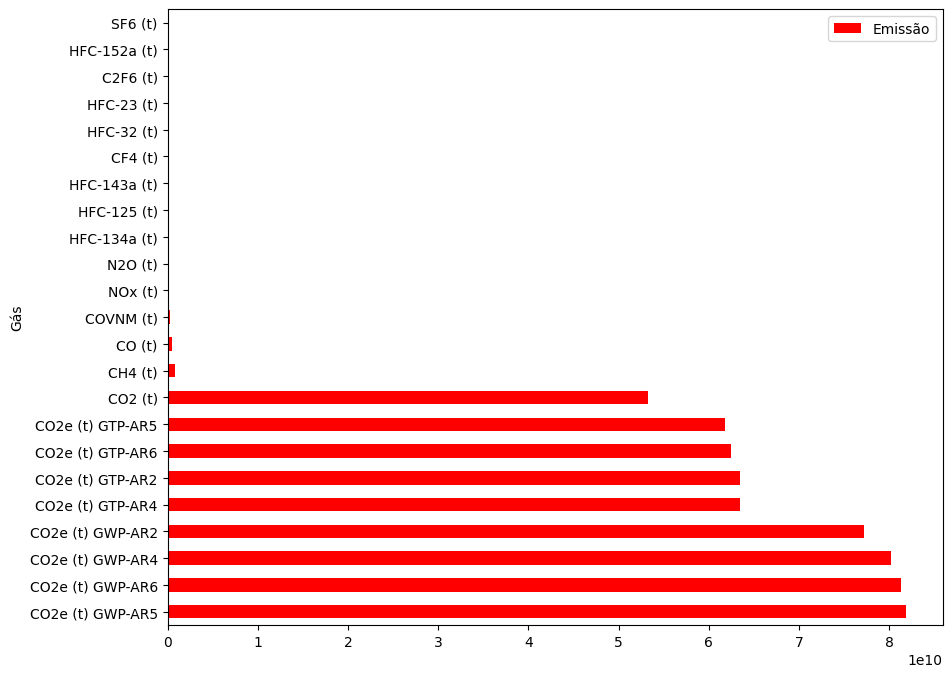

In [28]:
import matplotlib.pyplot as plt

emissao_por_gas.plot(kind='barh', figsize = (10,8), color = 'red');

###Comparando a emissão em porcentagem

In [31]:
#selecionamos os dados de 0 a 8, vamos obter o valor de emissão dos gases do tipo CO₂
emissao_por_gas.iloc[0:9]

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


In [37]:
print(f'A emissão de CO2 corresponde a {float((emissao_por_gas.iloc[0:9].sum()/emissao_por_gas.sum()).iloc[0])*100:.2f} % de emissão total de gases estufa no Brasil de 1970 a 2021.')

A emissão de CO2 corresponde a 99.74 % de emissão total de gases estufa no Brasil de 1970 a 2021.


In [38]:
# Forma mais pythonica de escrever

# Calcula a soma das 9 maiores emissões (CO2) e a soma total
sum_top_9 = emissao_por_gas.iloc[0:9].sum().iloc[0]
total_sum = emissao_por_gas.sum().iloc[0]

# Calcula a porcentagem e imprime
percentage = (sum_top_9 / total_sum) * 100

print(f"a emissão de CO2 corresponde a {percentage:.2f} % de emissão total de gases estufa no Brasil de 1970 a 2021")

a emissão de CO2 corresponde a 99.74 % de emissão total de gases estufa no Brasil de 1970 a 2021


---

## Para saber mais: como funciona o `groupby`

O método `groupby` do **pandas** segue o processo **split–apply–combine**:

1. **Dividir (split)**

   * Separa os dados em grupos com base em uma ou mais colunas.
   * Inspeção:

     ```python
     df.groupby("coluna").groups
     df.groupby("coluna").get_group("valor")
     ```

2. **Aplicar (apply)**

   * Funções comuns:

     * `mean()` → média dos valores do grupo
     * `sum()` → soma total do grupo
     * `size()` → número de elementos no grupo
     * `count()` → número de valores **não nulos**
     * `std()` → desvio padrão
     * `var()` → variância
     * `sem()` → erro padrão da média
     * `describe()` → estatísticas descritivas (média, min, max, etc.)
     * `first()` → primeiro valor do grupo
     * `last()` → último valor do grupo
     * `nth(n)` → n-ésimo valor
     * `min()` → menor valor
     * `max()` → maior valor

3. **Combinar (combine)**

   * Reúne os resultados em uma tabela agregada, permitindo comparação e análise dos grupos.

---

📌 **Resumo:**

* `groupby` = dividir → aplicar função → combinar resultados.
* Cada função traz um tipo de insight estatístico ou estrutural do grupo.

## 🧩 Lógica do `groupby`: Split – Apply – Combine

| Etapa        | O que significa              | O que acontece na prática |
|--------------|------------------------------|---------------------------|
| **Dividir**  | Separar os dados em grupos   | Ex.: agrupar vendas por região |
| **Aplicar**  | Executar função em cada grupo| Ex.: calcular soma ou média |
| **Combinar** | Reunir resultados em tabela  | Ex.: tabela final com resumo por região |


---


Exercício:

Solucione os problemas propostos através de códigos utilizando a base de dados disponibilizada no curso.

1.  Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para visualizar o dicionário contendo as chaves de grupos formados e a lista de índices de cada grupo.

2. Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" e localize os dados do grupo "Agropecuária".

3.  Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para identificar a média de emissão de cada setor no ano de 2021.

4.  Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para identificar a soma de emissão de cada setor. Ordene os dados da maior para menor emissão.

In [39]:
#1
emissoes_por_ano.groupby('Nível 1 - Setor').groups

{'Agropecuária': [1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, ...], 'Energia': [23277, 23278, 23279, 23280, 23281, 23282, 23283, 23284, 23285, 23286, 23287, 23288, 23289, 23290, 23291, 23292, 23293, 23294, 23295, 23296, 23297, 23298, 23299, 23300, 23301, 23302, 23303, 23304, 23305, 23306, 23307, 23308, 23309, 23310, 23311, 23312, 23313, 23314, 23315, 23316, 23317, 23318, 23319, 23320, 23321, 23322, 23323, 23324, 23325, 23326, 23327, 23328, 

In [41]:
#2
emissoes_por_ano.groupby('Nível 1 - Setor').get_group('Agropecuária').head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
1137,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AC,AGR,ALIM_BEBIDAS,1970,0.000000
1138,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AL,AGR,ALIM_BEBIDAS,1970,2050.445805
1139,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AM,AGR,ALIM_BEBIDAS,1970,0.000000
1140,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AP,AGR,ALIM_BEBIDAS,1970,0.000000
1141,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),BA,AGR,ALIM_BEBIDAS,1970,466.934705


In [42]:
#3
emissoes_por_ano.groupby('Nível 1 - Setor')[['Emissão']].mean()

,Emissão
Nível 1 - Setor,
Agropecuária,99652.875967
Energia,44010.696987
Mudança de Uso da Terra e Floresta,452271.859754
Processos Industriais,482031.877565
Resíduos,52131.972855


In [44]:
#4
emissoes_por_ano.groupby('Nível 1 - Setor')[
    ['Emissão']].sum().sort_values('Emissão', ascending = False)

,Emissão
Nível 1 - Setor,
Mudança de Uso da Terra e Floresta,3.524898e+11
Energia,1.205314e+11
Agropecuária,1.147284e+11
Processos Industriais,2.849965e+10
Resíduos,1.034465e+10
